In [136]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Reading Data

In [137]:
import numpy as np
data_path = '/content/gdrive/My Drive/AI LAB Colab Notebooks/Datasets/data.csv'
data =np.genfromtxt(data_path, delimiter=',')
centers_path = '/content/gdrive/My Drive/AI LAB Colab Notebooks/Datasets/centers.csv'
centers =np.genfromtxt(centers_path, delimiter=',')
print(type(data), type(centers))
print(data.shape, centers.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1200, 2) (6, 2)


#Scatter Plot Drawing

In [138]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
def drawScatter(clusters, centers, iter, z):
  print("")
  print('')
  clear_output(wait=True)
  plt.style.use('seaborn-whitegrid')
  x = []
  y = []
  for d in clusters:
      tempX = [data[l][0] for l in d]
      tempY = [data[l][1] for l in d]
      x.append(tempX)
      y.append(tempY)
  centerX = [centers[i][0] for i in range(6)]
  centerY = [centers[i][1] for i in range(6)]

  classes = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']

  for i in range(6):
    plt.scatter(x[i], y[i], cmap='viridis', marker='o', alpha=0.6, label=classes[i])
  plt.scatter(centerX, centerY, s=150, c='k', marker=(5, 1))
  if iter != 10:
    if z == 1:
      plt.title('K-Means Clustering \nIteration: 00'+str(iter)+"\nAssign data to centroids")
    else:
      plt.title('K-Means Clustering \nIteration: 00'+str(iter)+"\nUpdate centroids")
  else:
    plt.title('K-Means Clustered')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Classes')
  #plt.savefig('ScatterPlot_05.png')
  plt.show()
  time.sleep(.6)

#Search element in 2D list

In [139]:
def find(data, search):
    for i, e in enumerate(data):
        try:
            return i, e.index(search)
        except ValueError:
            pass
    raise ValueError("{} is not in list".format(repr(search)))

#K-Means Clustering Algo

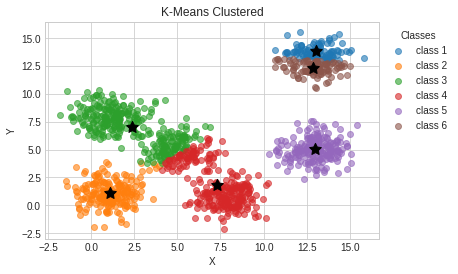

***********
Final Clustered data index= [[800, 802, 804, 805, 806, 809, 810, 811, 814, 815, 818, 821, 823, 826, 829, 832, 833, 835, 838, 839, 840, 841, 843, 844, 846, 847, 850, 852, 853, 857, 858, 859, 860, 866, 867, 868, 870, 871, 872, 879, 880, 887, 892, 893, 896, 898, 901, 902, 903, 904, 905, 906, 907, 908, 914, 916, 917, 918, 921, 923, 926, 928, 929, 931, 934, 937, 939, 940, 943, 948, 949, 952, 955, 957, 958, 959, 962, 963, 964, 965, 967, 968, 969, 971, 975, 976, 977, 978, 982, 983, 984, 985, 993, 994, 996, 997, 998, 999], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 1

In [140]:
clusters = [[] for i in range(6)]
iteration = 0

while True:
  temp_clusters = [[] for i in range(6)]

  for i, S in enumerate(data):

    min_dist = float('inf')
    min_index = -1
    for index, C in enumerate(centers):
      dist = np.linalg.norm(S - C)
      if(min_dist > dist):
        min_dist = dist
        min_index = index
    temp_clusters[min_index].append(i)
  drawScatter(temp_clusters, centers, iteration, 1) # Drawing after updating clustered data
  #print("Iteration=0",iteration,"\nChanging clusters")

  avg_list = []
  for L in temp_clusters:
    avg_data = [data[l] for l in L]
    avg_list.append(np.average(avg_data, axis=0))
  centers = np.array(avg_list)
  drawScatter(temp_clusters, centers, iteration, 2) # Drawing after updating centers
  #print("Iteration=0",iteration,"\nChanging centers")

  iteration += 1

  if (iteration > 1):
    shift = 0
    for s_index,S in enumerate(data):
      temp_pos = find(temp_clusters, s_index)
      clusters_pos = find(clusters, s_index)

      if (temp_pos[0] != clusters_pos[0]):
        shift += 1

    if (shift < 10):
      clusters = list(temp_clusters)
      break

  clusters = list(temp_clusters)
  #drawScatter(clusters, centers)
  #print("")
drawScatter(temp_clusters, centers, iteration, 9)
print("***********\nFinal Clustered data index=",clusters)
print("Total iteration=",iteration)

